In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")


In [4]:
#Look at city data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#Look at city data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, how='outer', on='city')
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
#determine city types
city_ride['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#determine distinct cities and number of occurances
city_ride['city'].value_counts()

West Angela             39
South Karenland         38
North Jason             35
Port Frank              33
Liumouth                33
South Phillip           31
South Evanton           31
West Robert             31
South Michelleport      31
New Kimberlyborough     30
Justinberg              30
West Anthony            30
North Jasmine           30
Royland                 30
East Kaylahaven         29
Hurleymouth             28
Karenside               28
Loganberg               28
West Heidi              28
Richardfort             28
East Marymouth          27
Christopherfurt         27
Carriemouth             27
Josephside              27
Lake Danielberg         26
West Christopherberg    26
West Josephberg         26
Port Samanthamouth      25
West Samuelburgh        25
Joneschester            25
                        ..
Lake Omar               14
Victoriaport            14
North Markport          14
North Richardhaven      14
Williamsonville         14
North Jeffrey           13
E

## Bubble Plot of Ride Sharing Data

In [2]:
#INSTRUCTIONS
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
# Make Grader Laugh

In [55]:
#Create separate data frames based on each city types as determined above using city_ride.unique()
urbs = city_ride.loc[(city_ride["type"] == "Urban")]
burbs = city_ride.loc[(city_ride["type"] == "Suburban")]
bethesda = city_ride.loc[(city_ride["type"] == "Rural")]

In [56]:
#verify new dataframes
bethesda.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [ ]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [57]:
# Average Fare ($), Total Number of Rides and Total Number of Drivers for Urbs cities
avg_fare_urbs = urbs.groupby(['city'])['fare'].mean()
total_rides_urbs = urbs.groupby(['city']).count()['ride_id']
total_drivers_urbs = urbs.groupby(['city'])['driver_count'].value_counts()

# Average Fare ($), Total Number of Rides and Total Number of Drivers for Burbs cities
avg_fare_burbs = burbs.groupby(['city'])['fare'].mean()
total_rides_burbs = burbs.groupby(['city']).count()['ride_id']
total_drivers_burbs = burbs.groupby(['city'])['driver_count'].value_counts()

# Average Fare ($), Total Number of Rides and Total Number of Drivers for Rural cities
avg_fare_rural = bethesda.groupby(['city'])['fare'].mean()
total_rides_rural = bethesda.groupby(['city']).count()['ride_id']
total_drivers_rural = bethesda.groupby(['city'])['driver_count'].value_counts()

In [58]:
#verify
total_drivers_burbs.head()

city           driver_count
Barronchester  11              16
Bethanyland    22              18
Brandonfort    10              19
Colemanland    23              22
Davidfurt      23              17
Name: driver_count, dtype: int64

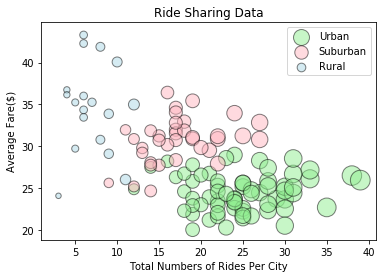

In [59]:
# Build the scatter plots for each city type
plt.scatter(total_rides_urbs, avg_fare_urbs,s=total_drivers_urbs*10,
            marker ='o', facecolors ="lightgreen", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_burbs, avg_fare_burbs,s=total_drivers_burbs*10,
            marker ='o', facecolors ="lightpink", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.5, label="Rural")

# Chart title
plt.title("Ride Sharing Data")
# x label
plt.xlabel("Total Numbers of Rides Per City")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')

# Save an image of the chart and print to screen
plt.savefig("Data/Pyber Ride Sharing.png")
plt.show()

## Total Fares by City Type

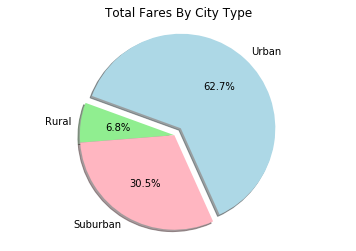

In [60]:
# Calculate Type Percents
total_fare = city_ride.groupby(['type'])['fare'].sum()

# pie chart labels
chart_labels = ["Rural","Suburban","Urban" ]

# pick your easter egg colors
colors = ["lightgreen","lightpink","lightblue"]
explode = (0, 0, 0.1)
plt.title("Total Fares By City Type")
plt.pie(total_fare, explode=explode, labels=chart_labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("data/Total Fares By City Type.png")
plt.show()
#This pie chart is ready for a baby shower

## Total Rides by City Type

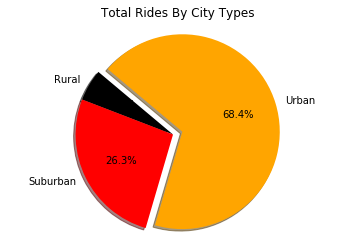

In [47]:
# total Rides by City Type
total_rides = city_ride.groupby(['type'])['ride_id'].count()

# pie chart labels
chart_labels = ["Rural","Suburban","Urban" ]

# hitting the color wheel
colors = ["black","red","orange"]
explode = (0, 0, 0.1)
plt.title("Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=chart_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("data/Total Rides By City Type.png")
plt.show()
#what is PacMan eating?

## Total Drivers by City Type

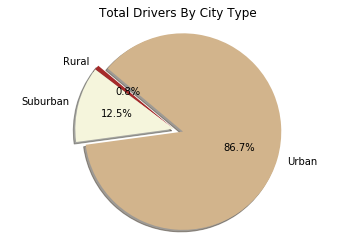

In [53]:
# total Drivers by City Type
total_drivers = city_ride.groupby(['type'])['driver_count'].sum()

# Labels for the sections of our pie chart
chart_labels = ["Rural","Suburban","Urban" ]

# How Beige can we get
colors = ["brown","beige","tan"]
explode = (0, 0, 0.1)
plt.title("Total Drivers By City Type")
plt.pie(total_drivers, explode=explode, labels=chart_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("data/% of Total Drivers By City Types.png")
plt.show()
#pantyhose colors from the eighties

In [ ]:
#your welcome